Курсовая ЧИМ

Введите точность 
0.00001
Шаг= 0.013888888888888888
+----------------------+-----------------------+------------------------+------------------------+
|          x           |      Рунге-Кутты      |        РУнге 2H        |           Dy           |
+----------------------+-----------------------+------------------------+------------------------+
| 0.013888888888888888 | 7.030399344901788e-05 |                        |                        |
| 0.027777777777777776 | 0.0002785491407188504 | 0.00027854925660907595 | 7.726015035346377e-12  |
| 0.041666666666666664 | 0.0006206834257959691 |                        |                        |
| 0.05555555555555555  | 0.0010925944490861586 | 0.0010925946812254859  | 1.5475955152804977e-11 |
| 0.06944444444444445  | 0.0016901201272916419 |                        |                        |
| 0.08333333333333334  | 0.0024090592168509385 |  0.002409059563686239  | 2.3122353366480016e-11 |
| 0.09722222222222224  | 0.0032451816208032168 |         

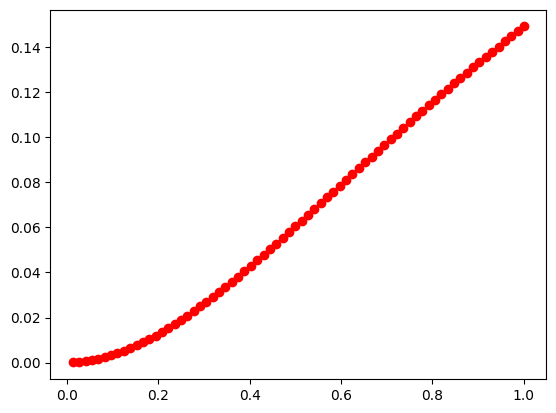

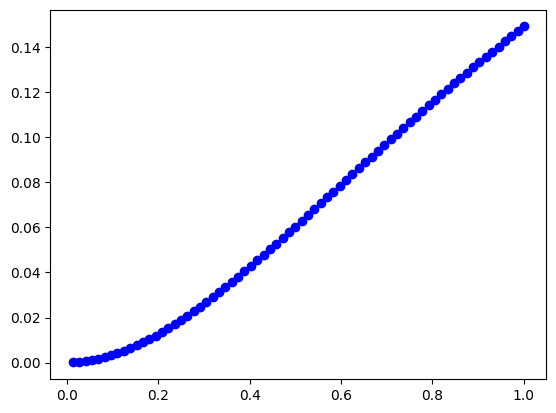

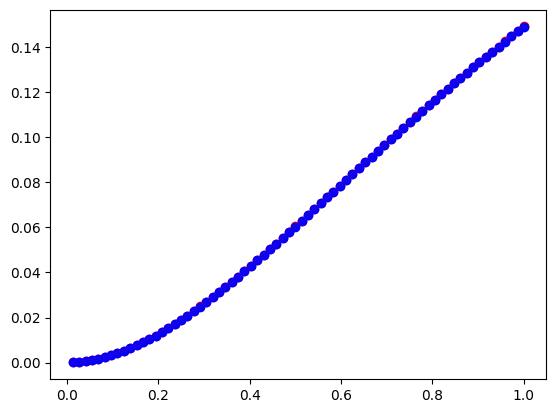

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
def FUNC(X,Y):
    return (2*X*np.exp(X*Y))/((1+X**2)*np.exp(1+X))

def Found(a,b,X,Y,eps,func):
    h=eps**(1/4)
    k = Runge(X+2*h, Y, h, func) -Runge(X+2*h, Y ,  2*h, func)
    if(abs(k/15)>eps):
        while True:
            k = (abs(Runge(X + 2 * h, Y, h, func) - Runge(X + 2 * h, Y, 2 * h, func)))
            if(abs(abs(k/15)-eps)<=eps*5) :
                break
            h = h / 2
    else:
        while True:
            k = (abs(Runge(X + 2 * h, Y + 2 * h, h, func) - Runge(X + 2 * h, Y + 2 * h, 2 * h, func)))
            if(abs(abs(k/15)-eps)>=eps):
                break
            h=h*2
    c=int((b-a)/h)
    c+=c%2
    h=(b-a)/(c)
    print("Шаг=",h)
    return h

def Runge(x, y, H, Func, ):
    F1=Func(x,y)
    F2=Func(x+H/2,y+(H/2)*F1)
    F3=Func(x+H/2,y+(H/2)*F2)
    F4 = Func(x+H, y+H*F3)
    return y+(H/6)*(F1+2*F2+2*F3+F4)

def Adams(X,Y,H,Func,xx):
    y=[]
    G=X
    y = np.zeros(len(xx)+1)
    for j in range(3):
        y[j]=Runge(G, Y, H, Func)
        Y=Runge(G,Y,H,Func)
        G+=H
    K0=Func(xx[2],y[2])
    K1=Func(xx[1],y[1])
    K2=Func(xx[0],y[0])
    for i in range(2,len(xx)-1):
        K3=K2
        K2=K1
        K1=K0
        K0=Func(xx[i],y[i])
        y[i+1] = y[i] + H * (55 * K0 - 59 * K1 + 37 * K2 -12*K3) / 24
        K0_T= Func(xx[i + 1], y[i + 1])
        y[i + 1] = y[i] + H * (9 * K0_T + 19 * K0 - 5 * K1 + K2) / 24
    y = y[:-1]
    return y


def PMethods(X,Y,H,Method,Func):
    YY=[]
    G=0
    for j in range(len(X)):
        YY.append(Method(G, Y, H, Func))
        Y=Method(G,Y,H,Func)
        G+=H
    return YY
a=0
b=1
e=0
z=0
while True:
    try:
        e =float(input("Введите точность \n"))
        z=1
    except ValueError:
        print("Задача не может быть решена")
    if z==1:
     if e<0.01:
         break
     else:
         print("Задача не может быть решена")
    z=0

e=float(e)
h=Found(a,b,0,0,e,FUNC)
xxp=[]
i=h
while i<b:
    xxp.append(i)
    i+=h
xx2p=[]
i=h
while i<b:
    xx2p.append(i)
    i+=2*h

yyA=Adams(0,0,h,FUNC,xxp)
yyR=PMethods(xxp,0,h,Runge,FUNC)
yy2A=Adams(0,0,2*h,FUNC,xx2p)
yy2R=PMethods(xx2p,0,2*h,Runge,FUNC)
Rungus = PrettyTable(['x', 'Рунге-Кутты', 'РУнге 2H','Dy'])
p=0
dR=[]
for i in range(len(xxp)):
    if i%2==0:
        Rungus.add_row([xxp[i], yyR[i], " ", " "])
    else:
        Rungus.add_row([xxp[i], yyR[i], yy2R[p], abs(yyR[i] - yy2R[p])/15])
        dR.append(abs(yyR[i] - yy2R[p])/15)
        p+=1
print(Rungus,"\n",'dy=max(1/15*|yR-y2R|)=',max(dR))


dA=[]
Amogus = PrettyTable(['x', 'Адамс', 'Адамс 2H','Dy'])
p=0
for i in range(len(xxp)):
    if i%2==0:
        Amogus.add_row([xxp[i], yyA[i]," ", " "])
    else:
        Amogus.add_row([xxp[i], yyA[i], yy2A[p], abs(yyA[i] - yy2A[p])/15])
        dA.append(abs(yyA[i] - yy2A[p])/15)
        p+=1
print(Amogus,"\n",'dy=max(1/15*|yR-y2R|)=',max(dA))

dRA=[]
output = PrettyTable(['x', 'Рунге-Кутты', 'Адамса',"dy"])
for i in range(len(xxp)):
    output.add_row([xxp[i],yyR[i],yyA[i],abs(yyR[i]-yyA[i])])
    dRA.append(abs(yyR[i]-yyA[i]))
print(output,"\n",'dy=max|yr-yA|=',max(dRA))
plt.scatter(xxp,yyR,color ="Red",label="Runge")
plt.plot(xxp,yyR,color ="Red",label="Runge")
plt.show()
plt.scatter(xxp,yyA,color ="blue",label="Adams")
plt.plot(xxp,yyA,color ="blue",label="Adams")
plt.show()
plt.scatter(xxp,yyR,color ="Red",label="Runge")
plt.plot(xxp,yyR,color ="Red",label="Runge")
plt.scatter(xxp,yyA,color ="blue",label="Adams")
plt.plot(xxp,yyA,color ="blue",label="Adams")
plt.show()

Курсовая МО


In [ ]:

import numpy as np
from numpy import sqrt, log,cos,sin
def f1(x):
    return (0.1*x-5)**8+cos(0.02*x)
def df1(x):
    return 4*((x/10 - 5)**7)/5 -sin(x/50)/50
def f2(x):
    return -sqrt(20*x-x**2)+0.01*sin(x)
def df2(x):
    return (-10 + x)/sqrt(-(-20 + x)*x) + 0.01*cos(x)
def f3(x):
    return log(x)+0.1*sin(0.1*x)
def df3(x):
    return 1/x + 0.01*cos(0.1*x)
def f4(x):
    return cos(x)/x**2
def df4(x):
    return -(2*cos(x) + x*sin(x))/x**3

def Golden(func,a,b,e):
    k = 1
    p=0
    while k>e:
        k=((sqrt(5)-1) / 2) * (b - a)
        x1=a+((3-sqrt(5))/2)*(b-a)
        x2 = a + ((sqrt(5)-1) / 2) * (b - a)
        if func(x1)<func(x2):
            b=x2
            p=0
        if func(x1)>func(x2):
            a=x1
            p=1
        print("x1 ",x1,"x2 ",x2,"fx1",func(x1),"fx2",func(x2),"en ",k)
    if not(p)==0:
        print("Ответ x=",x2,"func",func(x2),"\n")
    if not(p)==1:
        print("Ответ x=",x1 ,"func", func(x1),"\n")


print("№1\n")
print("№1.1\n")
Golden(f1,49,51,0.02)
print("№1.2\n")
Golden(f2,9,11,0.05)
print("№1.3\n")
Golden(f3,10,12,0.01)
print("№1.4\n")
Golden(f4,7,11,0.01)

def Secu(dfunc,a,b,e):
    while True:
        x=a-((dfunc(a))/((dfunc(a)-dfunc(b))))*(a-b)
        print(a,b)
        if abs(dfunc(x))<e:
            break
        if (dfunc(x))>0:
            b=x
        else:
            a=x
    print("x=",x)
    return x

print("№2\n")
print("№2.1\n")
print("func",f1(Secu(df1,49,51,0.02)),"\n")
print("№2.2\n")
print("func",f2(Secu(df2,9,11,0.05)),"\n")
print("№2.3\n")
print("func",f3(Secu(df3,10,12,0.01)),"\n")
print("№2.4\n")
print("func",f4(Secu(df4,7,11,0.01)),"\n")

print("№3\n")

def Jacobs1(X):
    return [4*(-1 + X[0])**3,2*X[1]-6]
def Hesse1(X):
    return [[(12*(X[0]-1)**2),0],[0,2]]

def Jacobs2(X):
    return [-1 - 2*X[0] + X[1],X[0]-2*X[1],2-2*X[2]]
def Hesse2(X):
    return [[-2,1,0],[1,-2,0],[0,0,-2]]

def Newton(x,JACOBS,HESSE,eps):
    while True:
        d=0
        print("x= ",x)
        x=x-np.dot(np.linalg.inv(HESSE(x)),JACOBS(x))
        a=len(JACOBS(x))
        k=np.absolute(JACOBS(x))
        for i in range(a):
            if k[i]<eps:
                d+=1
        if d==a:
            break
    print("Ответ",x)
print("№3.1\n")
Newton([1000,1000],Jacobs1,Hesse1,0.000001)
print("№3.2\n")
Newton([500,-150,1],Jacobs2,Hesse2,0.000001)

№1

№1.1

x1  49.763932022500214 x2  50.236067977499786 fx1 0.5442691561864065 fx2 0.5363234115662272 en  1.2360679774997898
x1  50.23606797749979 x2  50.52786404500042 fx1 0.536323411566227 fx2 0.5313887156586753 en  0.7639320225002082
x1  50.52786404500042 x2  50.70820393249937 fx1 0.5313887156586753 fx2 0.528329846687123 en  0.47213595499957717
x1  50.708203932499366 x2  50.819660112501055 fx1 0.5283298466871232 fx2 0.5264359236942094 en  0.2917960675006311
x1  50.81966011250105 x2  50.88854381999832 fx1 0.5264359236942094 fx2 0.5252641073653688 en  0.1803398874989505
x1  50.88854381999832 x2  50.93111629250273 fx1 0.5252641073653688 fx2 0.5245393870543168 en  0.11145618000168497
x1  50.931116292502736 x2  50.95742752749558 fx1 0.5245393870543168 fx2 0.5240912954200907 en  0.06888370749726552
x1  50.95742752749558 x2  50.973688765007154 fx1 0.5240912954200907 fx2 0.5238142871348509 en  0.04257247250441506
x1  50.97368876500715 x2  50.983738762488436 fx1 0.5238142871348509 fx2 0.5236